In [1]:
from google.colab import drive
drive._mount('/content/drive')   # add _ for connect different account google 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-basic

/content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-basic


In [3]:
# train model và show ra history
import train
# name in [unet-v1, unet-v3, unet++]
model_and_path = train.load_model("unet++",False)
H, model = train.fit_model(model_and_path)

load unet ++ 
Epoch 1/10
100/100 [==============================] - ETA: 0s - loss: 0.1039 - iou_score: 0.8396 - dice_coef: 0.8961
Epoch 00001: saving model to /content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-basic/model/unet_nested_v2.h5
100/100 [==============================] - 100s 901ms/step - loss: 0.1039 - iou_score: 0.8396 - dice_coef: 0.8961 - val_loss: 0.0585 - val_iou_score: 0.8903 - val_dice_coef: 0.9415 - lr: 1.0000e-04
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 0.0521 - iou_score: 0.9015 - dice_coef: 0.9479
Epoch 00002: saving model to /content/drive/MyDrive/20211/prj3/neoplasm-detection/unet-basic/model/unet_nested_v2.h5
100/100 [==============================] - 98s 978ms/step - loss: 0.0521 - iou_score: 0.9015 - dice_coef: 0.9479 - val_loss: 0.0592 - val_iou_score: 0.8888 - val_dice_coef: 0.9408 - lr: 1.0000e-04
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 0.0521 - iou_score: 0.9016 - dice_coef: 0.9479
Epoch 

ValueError: ignored

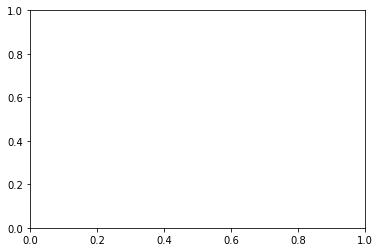

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import config 
fig = plt.figure()
numOfEpoch = config.EPOCH 
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss') 
plt.plot(np.arange(0, numOfEpoch), H.history['dice_coef'], label='dice_score')
plt.plot(np.arange(0, numOfEpoch), H.history['iou_score'], label='iou_score')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [ ]:
import os
import config
from data_prepare import *
from google.colab.patches import cv2_imshow
import cv2
import train

# model = train.load_model("unet-v1") 
test_image_list = [os.path.join(config.IMAGE_PATH, f'{x}') for x in os.listdir(config.IMAGE_PATH)]

list_image = []

for path in test_image_list[14:20]:
  test_img = read_image(path)  
  mask_img = read_image("/content/drive/MyDrive/20211/prj3/data/train_gt/train_gt/"+ str(path).split("/")[-1] )    

  list_image.append(test_img)
  list_image.append(mask_img)
  predict = model.predict(np.expand_dims(test_img, axis=0))[:]    
  predict_max = np.argmax(predict, axis=-1)   
  img =predict_max[0]
  test = np.zeros((256,256,3), dtype=np.uint8)   # why int 64 ? -> chuyển về uint8 ngon hơn ?? 
  for i in range(255):
    for j in range(255):
      if img[i,j] == 1:
        test[i,j] =  [0,0,255]
      if img[i,j] == 2:
        test[i,j] = [0,255,0] 
  list_image.append(test)

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import numpy as np

fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111, 
                 nrows_ncols=(int(len(list_image)/3), 3),  
                 axes_pad=0.1,  # pad between axes
                 )

for ax, im in zip(grid, list_image):
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    ax.imshow(im)

plt.show()


In [ ]:
import test
import train

# name in [unet-v1, unet-v3, unet++]
name = "unet++"
model = train.load_model(name)
test.predict(model, name)

In [ ]:
# đợi tí cho chắc vì sợ drive k đẩy lên kịp

from predict_collection import submit_origin
submit_origin.make_submit("unet++")